In [320]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')
end=date.today()
start=date.today()-datetime.timedelta(1200)


In [344]:
df= web.DataReader('SOFI', data_source='yahoo', start=start, end=end)
df2= web.DataReader('Open', data_source='yahoo', start=start, end=end)
df3= web.DataReader('FUBO', data_source='yahoo', start=start, end=end)
df4= web.DataReader('GME', data_source='yahoo', start=start, end=end)
df5= web.DataReader('AMC', data_source='yahoo', start=start, end=end)
df6= web.DataReader('DIS', data_source='yahoo', start=start, end=end)
df7= web.DataReader('F', data_source='yahoo', start=start, end=end)
df8= web.DataReader('ADA-USD', data_source='yahoo', start=start, end=end)
df9= web.DataReader('DOT-USD', data_source='yahoo', start=start, end=end)
df10= web.DataReader('SOL-USD', data_source='yahoo', start=start, end=end)
df11= web.DataReader('LAC', data_source='yahoo', start=start, end=end)

In [322]:
#Get the number of rows and columns of the DF
df.shape
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,12.59,11.800000,12.590000,12.200000,1371400,12.200000
2021-01-05,12.28,12.090000,12.150000,12.150000,1304000,12.150000
2021-01-06,12.20,11.890000,12.150000,12.120000,1105700,12.120000
2021-01-07,22.00,12.050000,12.200000,19.139999,64877000,19.139999
2021-01-08,22.00,17.889999,21.459999,18.740000,35657000,18.740000
...,...,...,...,...,...,...
2021-12-17,14.77,13.660000,14.080000,14.650000,44289600,14.650000
2021-12-20,15.21,14.280000,14.480000,14.590000,31658600,14.590000
2021-12-21,15.17,14.720000,14.870000,14.970000,27695600,14.970000


Text(0, 0.5, 'Price(USD)')

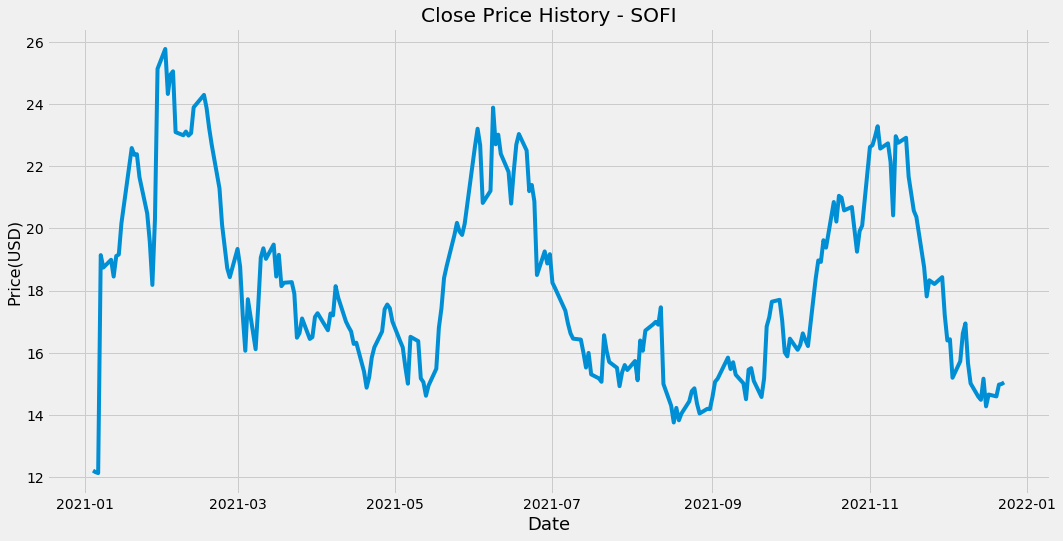

In [323]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - SOFI')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [324]:
#Sofi Daily Change
yesterday=end-datetime.timedelta(1)
percent_change=0.00000000000000
yest_close=df.at[yesterday,'Close']
two_day_close=df.at[(yesterday-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 0.13359721932272817% day over day
Close Cost of $14.989999771118164


Text(0, 0.5, 'Price(USD)')

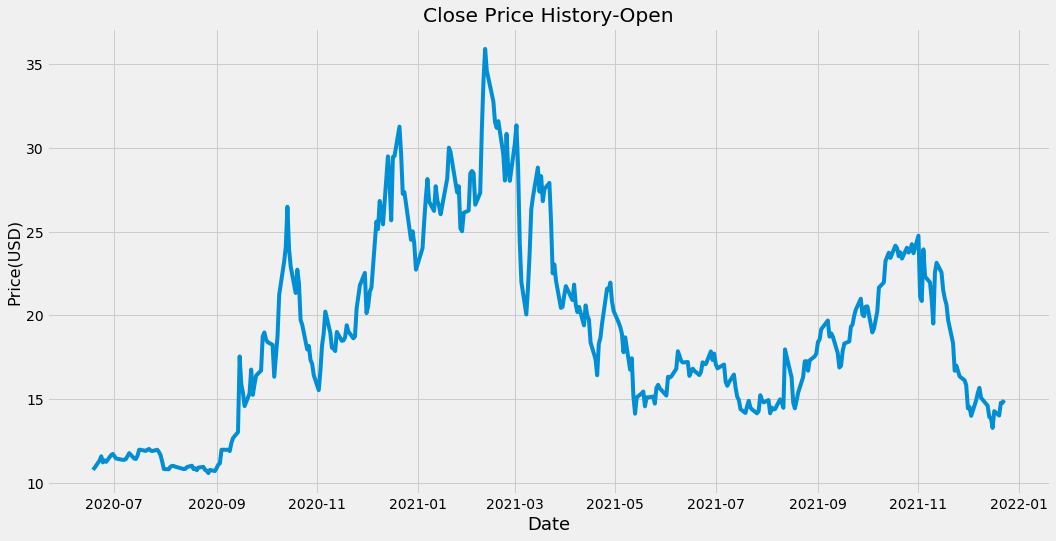

In [325]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History-Open')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [326]:
#Open Daily Change
percent_change=0.00000000000000
yest_close=df2.at[date.today(),'Close']
two_day_close=df2.at[(date.today()-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 1.1494258061691445% day over day
Close Cost of $14.960000038146973


Text(0, 0.5, 'Price(USD)')

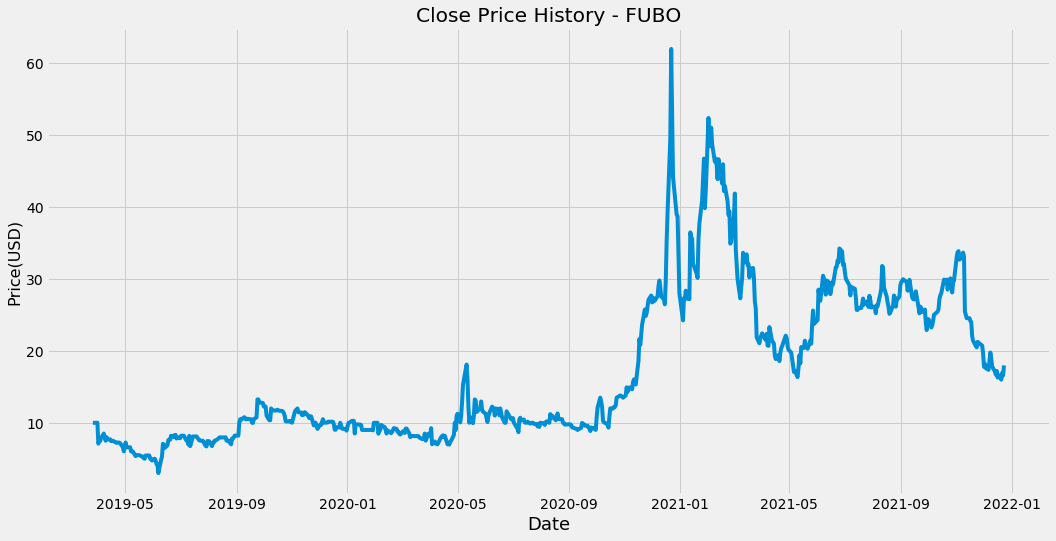

In [327]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - FUBO')
plt.plot(df3['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [328]:
#Fubo Daily Change
percent_change=0.00000000000000
yest_close=df3.at[date.today(),'Close']
two_day_close=df3.at[(date.today()-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 8.348403955052335% day over day
Close Cost of $17.975000381469727


Text(0, 0.5, 'Price(USD)')

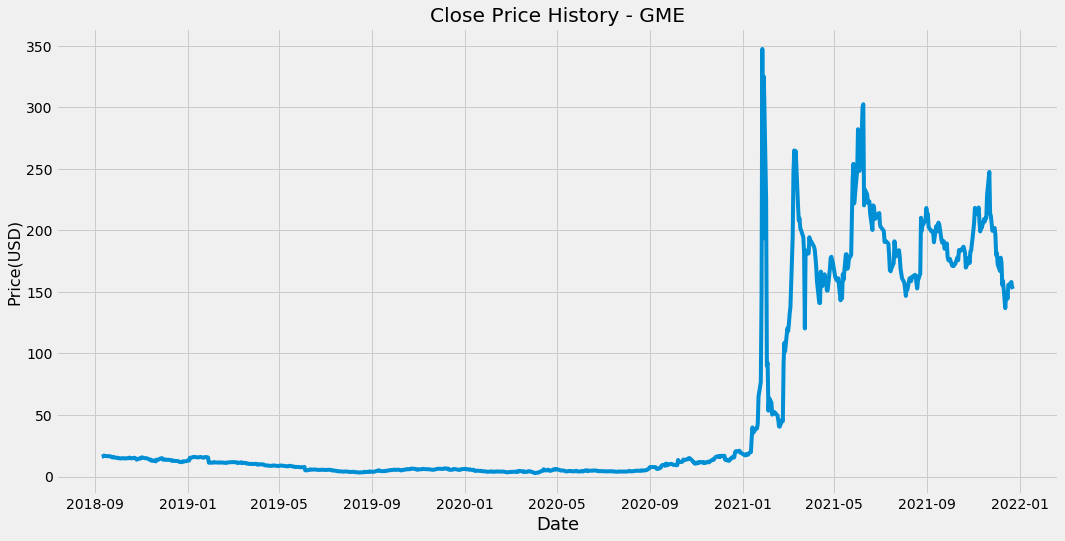

In [329]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - GME')
plt.plot(df4['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [330]:
#GME Daily Change
percent_change=0.00000000000000
yest_close=df4.at[date.today(),'Close']
two_day_close=df4.at[(date.today()-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent loss of -1.0129854276582793% day over day
Close Cost of $152.44000244140625


Text(0, 0.5, 'Price(USD)')

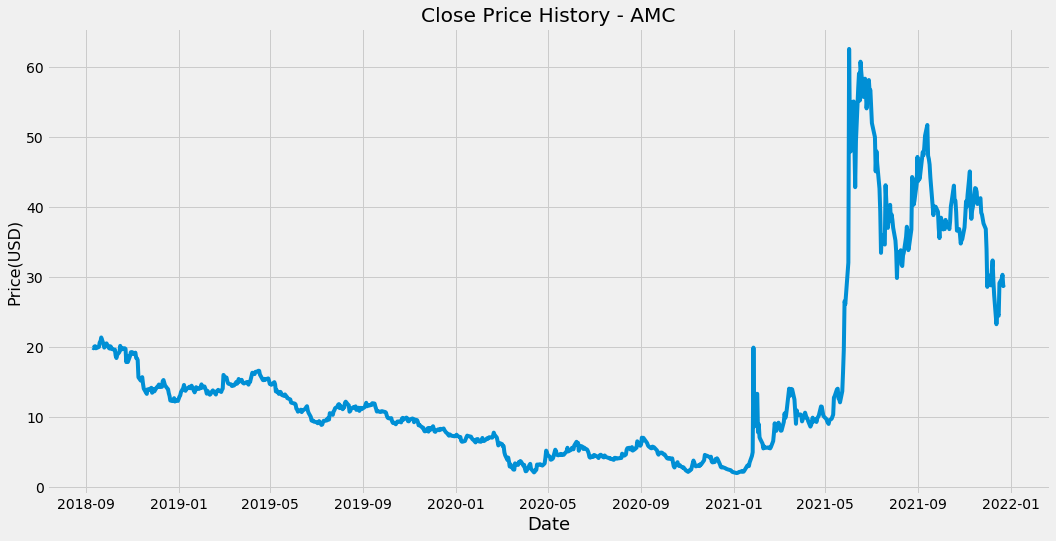

In [331]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - AMC')
plt.plot(df5['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [332]:
#AMC Daily Change
percent_change=0.00000000000000
yest_close=df5.at[date.today(),'Close']
two_day_close=df5.at[(date.today()-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 0.5927478189854343% day over day
Close Cost of $28.850000381469727


Text(0, 0.5, 'Price(USD)')

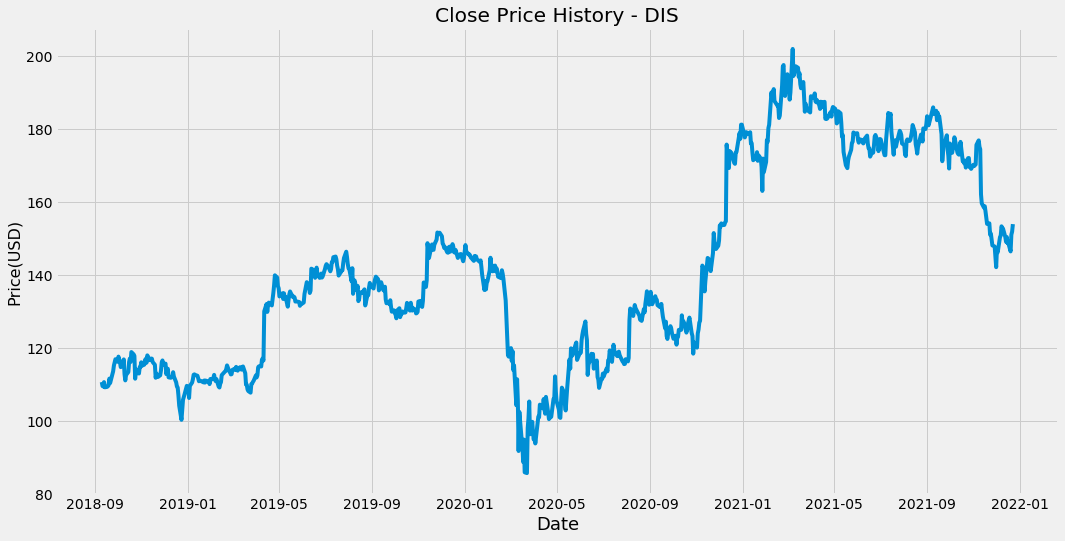

In [333]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - DIS')
plt.plot(df6['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [334]:
#DIS Daily Change
percent_change=0.00000000000000
yest_close=df6.at[date.today(),'Close']
two_day_close=df6.at[(date.today()-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 1.356332296791274% day over day
Close Cost of $153.94000244140625


Text(0, 0.5, 'Price(USD)')

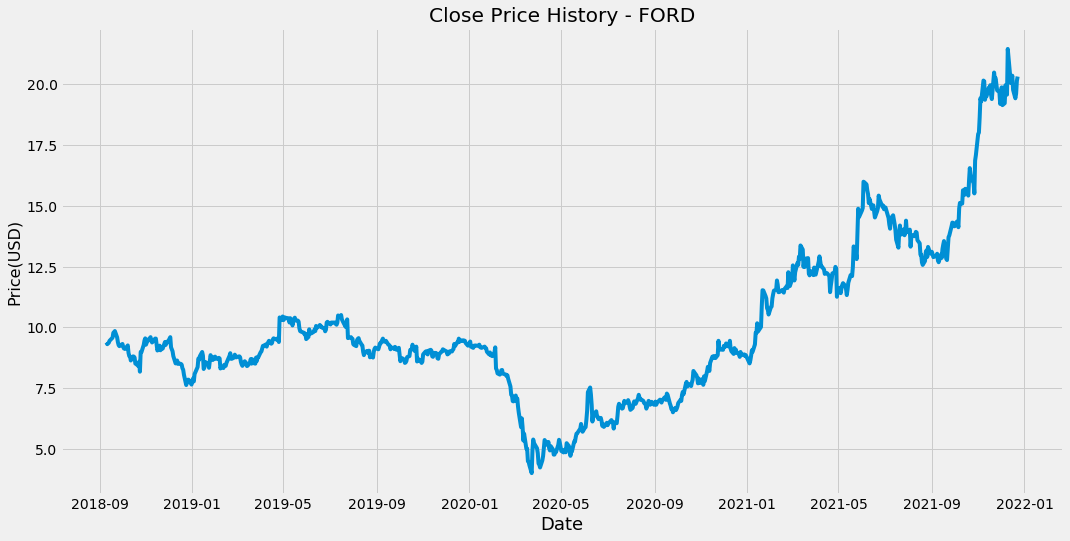

In [335]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - FORD')
plt.plot(df7['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [336]:
#Ford Daily Change
percent_change=0.00000000000000
yest_close=df7.at[date.today(),'Close']
two_day_close=df7.at[(date.today()-datetime.timedelta(1)),'Close']
percent_change=((yest_close-two_day_close)/two_day_close)
if (yest_close < two_day_close):
    print('Percent loss of '+str(percent_change*100)+'% day over day')
else:
    print('Percent gain of '+str(percent_change*100)+'% day over day')
print('Close Cost of $'+str(yest_close))

Percent gain of 0.8689232855643819% day over day
Close Cost of $20.315000534057617


Text(0, 0.5, 'Price(USD)')

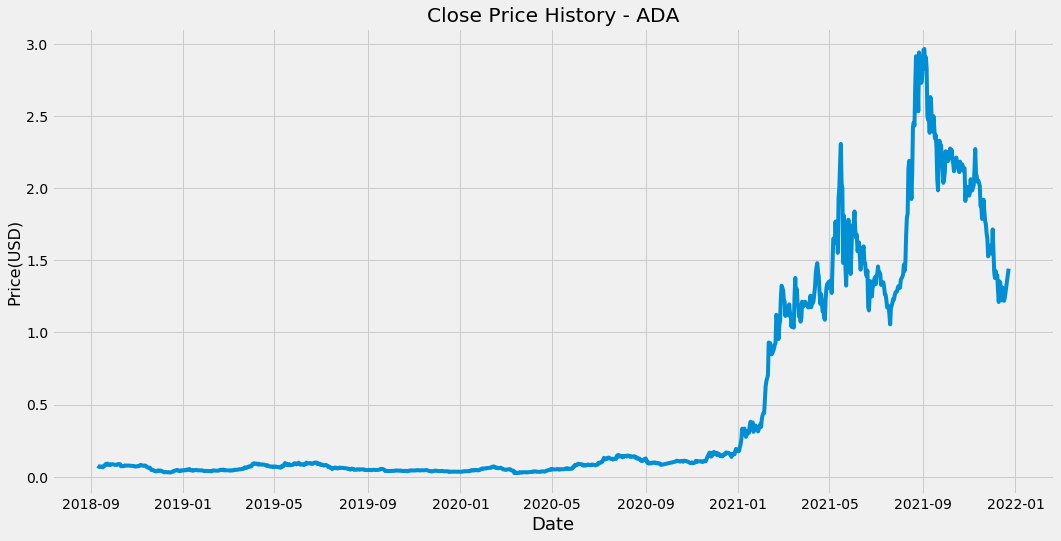

In [337]:
#Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History - ADA')
plt.plot(df8['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [338]:
#ADA Weekly Change
percent_change=0.00000000000000
yest_close=df8.at[date.today(),'Close']
week_ago_close=df8.at[(date.today()-datetime.timedelta(7)),'Close']
percent_change=((yest_close-week_ago_close)/week_ago_close)
if (yest_close < week_ago_close):
    print('Percent loss of '+str(percent_change*100)+'% week over week')
else:
    print('Percent gain of '+str(percent_change*100)+'% week over week')
print('Close Cost of $'+str(yest_close))

Percent gain of 16.345726499956324% week over week
Close Cost of $1.4433082342147827


Text(0, 0.5, 'Price(USD)')

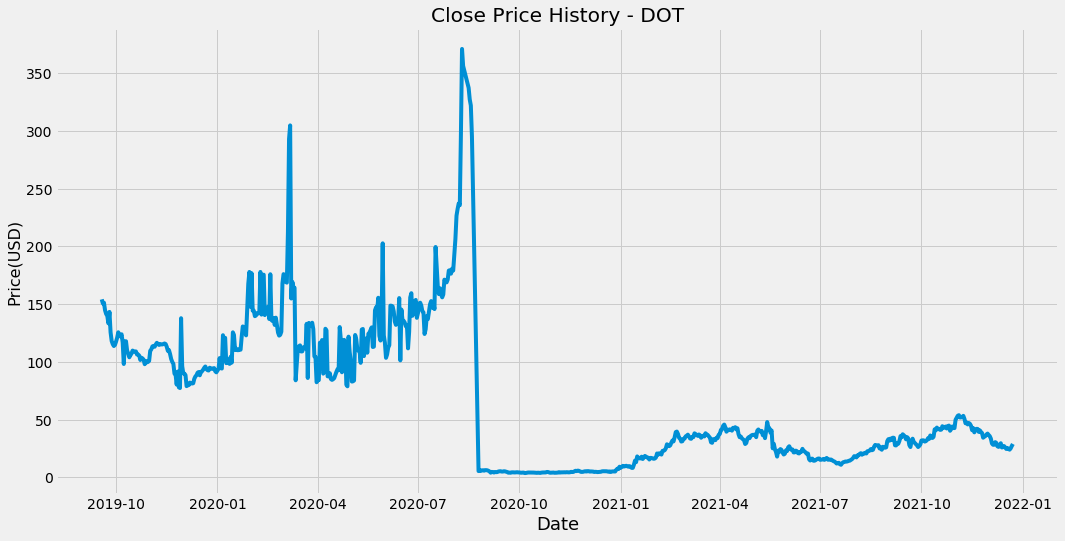

In [339]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - DOT')
plt.plot(df9['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [340]:
#DOT Weekly Change
percent_change=0.00000000000000
yest_close=df9.at[date.today(),'Close']
week_ago_close=df9.at[(date.today()-datetime.timedelta(7)),'Close']
percent_change=((yest_close-week_ago_close)/week_ago_close)
if (yest_close < week_ago_close):
    print('Percent loss of '+str(percent_change*100)+'% week over week')
else:
    print('Percent gain of '+str(percent_change*100)+'% week over week')
print('Close Cost of $'+str(yest_close))

Percent gain of 11.208706735345563% week over week
Close Cost of $28.962169647216797


Text(0, 0.5, 'Price(USD)')

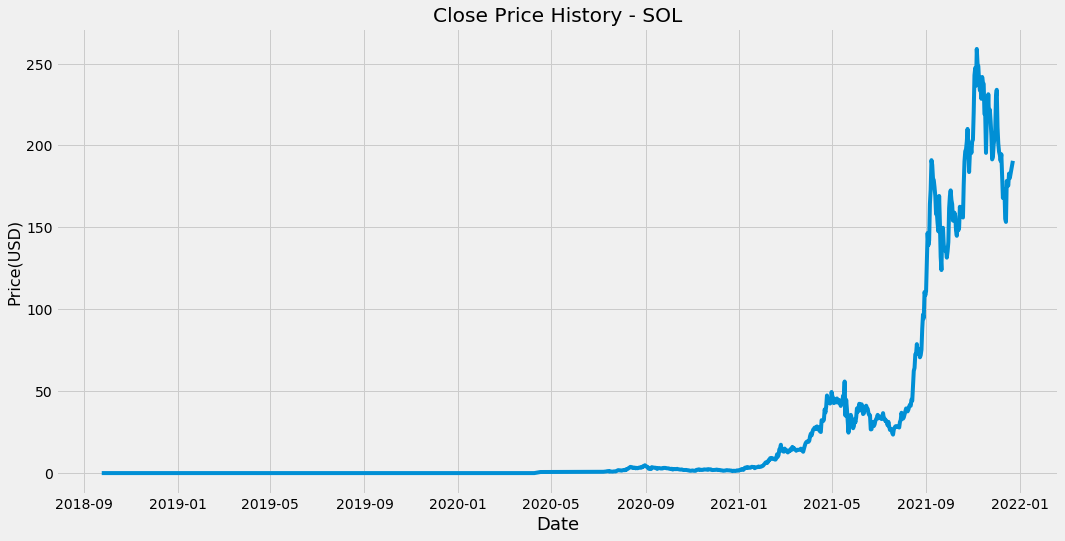

In [341]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - SOL')
plt.plot(df10['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [342]:
#SOL Weekly Change
percent_change=0.00000000000000
yest_close=df10.at[date.today(),'Close']
week_ago_close=df10.at[(date.today()-datetime.timedelta(7)),'Close']
percent_change=((yest_close-week_ago_close)/week_ago_close)
if (yest_close < week_ago_close):
    print('Percent loss of '+str(percent_change*100)+'% week over week')
else:
    print('Percent gain of '+str(percent_change*100)+'% week over week')
print('Close Cost of $'+str(yest_close))

Percent gain of 7.728375020188583% week over week
Close Cost of $190.63038635253906


Text(0, 0.5, 'Price(USD)')

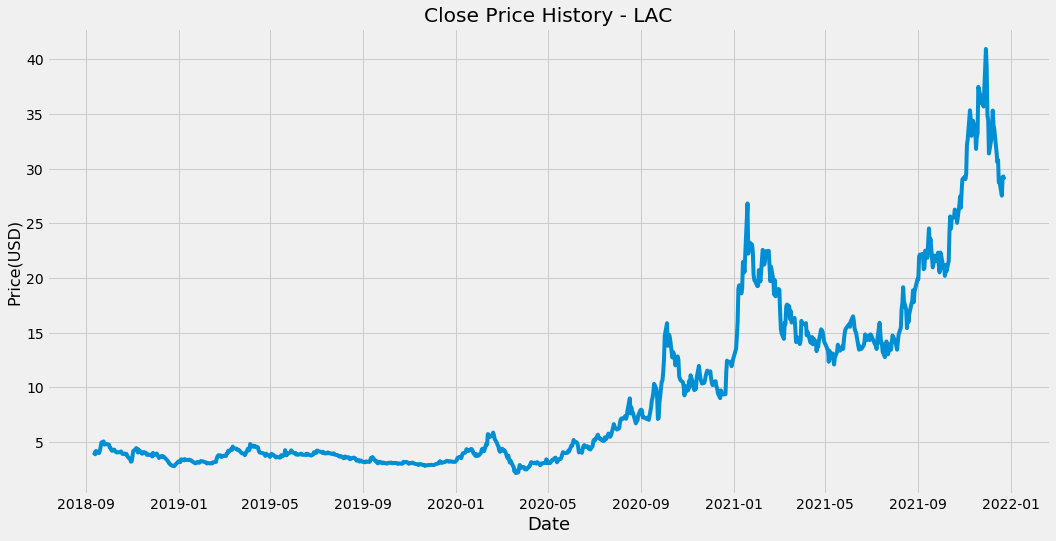

In [346]:
plt.figure(figsize=(16,8))
plt.title('Close Price History - LAC')
plt.plot(df11['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price(USD)',fontsize=16)

In [347]:
#LAC Weekly Change
percent_change=0.00000000000000
yest_close=df11.at[date.today(),'Close']
week_ago_close=df11.at[(date.today()-datetime.timedelta(7)),'Close']
percent_change=((yest_close-week_ago_close)/week_ago_close)
if (yest_close < week_ago_close):
    print('Percent loss of '+str(percent_change*100)+'% week over week')
else:
    print('Percent gain of '+str(percent_change*100)+'% week over week')
print('Close Cost of $'+str(yest_close))

Percent gain of 0.9043486221976902% week over week
Close Cost of $29.010000228881836
